<a href="https://colab.research.google.com/github/SuyogBhatkhalkar/DataSciense_Study_Notes/blob/main/Hypothesis_testing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is collection of the hyptheses testing methods: 
  
  1. Z test : Testing with two sample, comapring mean of two propotions
  2. Z Test : Testing with one sample : One tailed test and two tail test
  3. T test : One sample one tail test
  4. T test : two tail test
  5. Chi Square Test: Goodness of Fit
  6. Chi Square Test : Test of independnce 
  7. Chi Sqaure test : Test of sinlge varaince /homogeneity
  8. One-way ANOVA:  test of two variances


  The smaller the p-value, the stronger the evidence that you should reject the null hypothesis.
  A p-value less than 0.05 (typically ≤ 0.05) is statistically significant. It indicates strong evidence against the null hypothesis, as there is less than a 5% probability the null is correct (and the results are random). Therefore, we reject the null hypothesis, and accept the alternative hypothesis.

  A p-value higher than 0.05 (> 0.05) is not statistically significant and indicates strong evidence for the null hypothesis. This means we retain the null hypothesis and reject the alternative hypothesis. You should note that you cannot accept the null hypothesis, we can only reject the null or fail to reject it.

Z Test : It can be taken when the population variance  is known or sample size is > 30. Z test is simple z score of the population mean.

**Two sample propotion Right Tailed  Z test**

Example : 
We want to know if Girls on average score 10 marks more than the boys. We have the information that the standard deviation for girls’ Score is 100 and for boys’ score is 90. Then we collect the data of 20 girls and 20 boys by using random samples and record their marks. Finally, we also set our ⍺ value (significance level) to be 0.05.

**ztest parameters**

1) **x1, x2 ** array_like, 1-D or 2-D two independent samples X2, is optional for one sample test.
2) **value ** float In the one sample case, value is the mean of x1 under the Null hypothesis. In the two sample case, value is the difference between mean of x1 and mean of x2 under the Null hypothesis. The test statistic is x1_mean - x2_mean - value.
3) **alternative** : string
The alternative hypothesis, H1, has to be one of the following 
  1. 'two-sided' : Two tailed test
  2. larger : Right Tailed test
  3. Smaller : Left tailed test
4)** usevar   string **, 'pooled'
Currently, only 'pooled' is implemented. If pooled, then the standard deviation of the samples is assumed to be the same. see CompareMeans.ztest_ind for different options.
ddof : int
5) **ddof : int** Degrees of freedom use in the calculation of the variance of the mean estimate. In the case of comparing means this is one, however it can be adjusted for testing other statistics (proportion, correlation) bold text


In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
girl_score = [605, 700, 400, 450, 480, 510, 900, 950, 600, 510, 790, 800, 810, 850, 830, 600, 845, 822, 890, 910]
boys_score = [500, 510, 520, 400, 300, 600, 700, 800, 900, 870, 880, 856, 890, 910, 940, 850, 700, 720, 740, 760]
girls = np.array(girl_score)
boys = np.array(boys_score)
girls_sigma = np.std(girls)
boys_sigma = np.std(boys)
means = girls_sigma- boys_sigma
ztets , pval = stests.ztest(girl_score,boys_score, value=means,alternative='larger')
print(float(pval))

if pval < 0.05: 
  print("Reject the null hypothesis")
else : 
  print("Accept the null hypthesis")

0.45715854757429847
Accept the null hypthesis


**Two Sample Propotaion Two tail test **
In above example if we change condition for null hypothesis from less /grater than to not equal , the test will be two tailed test. Where null hypotheisis will be average Girl's  score is equal to boy's score and alternate hypothesis will be girls score is either less or greater than the boys score. 



In [ ]:
# Below will be change from above example code
ztets_2tailed , pval_2tailed = stests.ztest(girl_score,boys_score, value=means,alternative='two-sided')
print(float(pval))

if pval_2tailed < 0.05: 
  print("Reject the null hypothesis")
else : 
  print("Accept the null hypthesis")

0.45715854757429847
Accept the null hypthesis


**One Sample  Left Tailed Z test**

1,500 women followed the Atkin’s diet for a month. A random sample of 29 women gained an average of 5.54 pounds. Test the hypothesis that the average weight gain per woman for the month was over 5 pounds. The standard deviation for all women in the group was 7.1. 


In above example Null hypothesis is :  Average weight gain per woman is < 5 pounds.
Alternative hypotheisis is : Average weight gain per woman is > 5 pounds. 
This is one sample one tailed test.  As the standard deviation and average of population is know, this is Z test example. 
As population data is missing from above example, we can not use the built in function to get the Z value, instead we will use z score formula for one sample , one tailed test.

**One Sample Two tailed Z test**

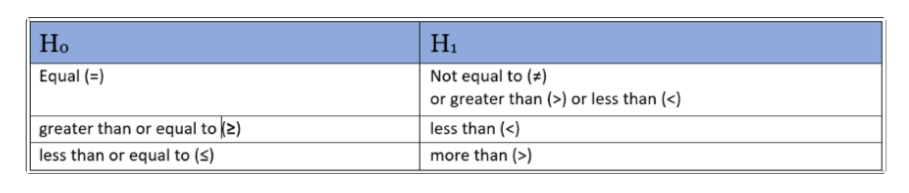

In One Sample Two tailed test Alternate Hypothesis has less than and greater than properties while null hypothesis is alawys have equal relationship.

In [ ]:
weight_gained_by_women = [4,3,4,6,7,8.5, 2.3 ,1, 4,6,8.7,3.4, 2.1, 1.0, -2.4, 4, 5.1, -3.2, 7, 3,6,9,3.4, 0, 1.2, 4,5,6.7, 6,7]
sample = np.array(weight_gained_by_women)
sample_size = len(sample)
sample_mean = np.mean(sample,axis=0)
population_mean = 5
std_Deviation_population = 7.1

ztest_score, p_value = stests.ztest(sample,value = sample_mean, alternative='larger')
print(ztest_score, p_value)
if(p_value <  0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")
# One Sample Two tailed test 

ztest_score_2Tailed, p_value_2tailed = stests.ztest(sample,value = sample_mean, alternative='two-sided')
print(ztest_score, p_value)
if(p_value_2tailed <  0.05):
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")



0.0 0.5
Fail to Reject NUll Hypothesis
0.0 0.5
Fail to Reject NUll Hypothesis


**T Test **
When the sample size is less thna 30, T test is useful. T 
The parametric test called t-test is based on a student’s t statistic. 
Test assumes below: 
1. variables are drawn from the normal population. 
2. The mean of the population in this statistic of t-test has been assumed to be known. 
3.The distribution, called t-distribution, has a similar shape to that of a normal distribution, i.e. a bell shaped appearance.


**One Sample T test**

scipy.stats.ttest_1samp  : Is used for one sample T test. It accept the parmaters as below: 
1. array_like Sample observation.
2. popmeanfloat or array_like Expected value in null hypothesis. If array_like, then it must have the same shape as a excluding the axis dimension.
3. axisint or None, optional Axis along which to compute test; default is 0. If None, compute over the whole array a.
4. nan_policy{‘propagate’, ‘raise’, ‘omit’}, optional
Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):
  a.‘propagate’: returns nan
  b.‘raise’: throws an error
  c.‘omit’: performs the calculations ignoring nan values
5.alternative{‘two-sided’, ‘less’, ‘greater’}, optional
Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):
a. ‘two-sided’ :  Two tailed
b. ‘less’: left tailed
c. ‘greater’: right tatiled

**Example**
Data:Systolic blood pressures of 14 patients are given below:

183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138

Test, whether the population mean, is less than 165.

Hypothesis
H0: There is no significant mean difference in systolic blood pressure. i.e., μ = 165

H1: The population mean is less than 165. i.e., μ < 165
This one sample left tailed test.

In [ ]:
sys_bp=[183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138]


mu=165
# as alternative is available from scipy 1.6.0, force colab to use that version

!pip install scipy==1.6.0
from scipy import stats

result = stats.ttest_1samp(sys_bp, mu,  axis=0, nan_policy='propagate', alternative='less')
if(result.pvalue < 0.05) : 
   print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")



Fail to Reject NUll Hypothesis


**Two sample Two tailed t-test **
Example:
Compare the effectiveness of ammonium chloride and urea, on the grain yield of paddy, an experiment was conducted. The results are given below:

Ammonium chloride (X1) = 13.4	10.9	11.2	11.8	14	15.3	14.2	12.6	17	16.2	16.5	15.7

Urea (X2) =	12	11.7	10.7	11.2	14.8	14.4	13.9	13.7	16.9	16	15.6	16

H0: The effect of ammonium chloride and urea on grain yield of paddy are equal i.e., μ1 = μ2

H1: The effect of ammonium chloride and urea on grain yield of paddy is not equal i.e., μ1 ≠ μ2

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0) 
Parameters
1. a, b array_like : The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default).
2. axisint or None, optional : Axis along which to compute test. If None, compute over the whole arrays, a, and b.
3. equal_varbool, optional : If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].
4. nan_policy{‘propagate’, ‘raise’, ‘omit’}, optional : Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):
a. ‘propagate’: returns nan
b. ‘raise’: throws an error
c. ‘omit’: performs the calculations ignoring nan values
The ‘omit’ option is not currently available for permutation tests or one-sided asympyotic tests.
5. permutationsnon-negative int, np.inf, or None (default), optional
If 0 or None (default), use the t-distribution to calculate p-values. Otherwise, permutations is the number of random permutations that will be used to estimate p-values using a permutation test. If permutations equals or exceeds the number of distinct partitions of the pooled data, an exact test is performed instead (i.e. each distinct partition is used exactly once). 
6. random_state{None, int, numpy.random.Generator,
numpy.random.RandomState}, optional : If seed is None (or np.random), the numpy.random.RandomState singleton is used. If seed is an int, a new RandomState instance is used, seeded with seed. If seed is already a Generator or RandomState instance then that instance is used.
7. alternative{‘two-sided’, ‘less’, ‘greater’}, optional
Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):
8. trimfloat, optional :If nonzero, performs a trimmed (Yuen’s) t-test. Defines the fraction of elements to be trimmed from each end of the input samples. If 0 (default), no elements will be trimmed from either side. The number of trimmed elements from each tail is the floor of the trim times the number of elements. Valid range is [0, .5).



In [ ]:
import numpy as np

ammmonium = [13.4, 10.9 ,11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7 ]
Urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]
x1 = np.array(ammmonium)
x2= np.array(Urea)

result = stats.ttest_ind(x1,x2,axis=0, nan_policy='propagate', alternative='two-sided')
if(result.pvalue < 0.05) : 
   print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")


Fail to Reject NUll Hypothesis


**Paired t-test**
A paired t-test is used when we are interested in the difference between two variables for the same subject. Often the two variables are separated by time.


**Example**
Eleven schoolboys were given a test in Statistics. They were given a Month’s tuition and a second test were held at the end of it. Do the marks give evidence that the students have benefited from the exam coaching?

Marks in 1st test: 23 20 19 21 18 20 18 17 23 16 19

Marks in 2nd test: 24 19 22 18 20 22 20 20 23 20 18

Hypothesis
H0: The students have not benefited from the tuition class. i.e., d = 0

H1: The students have benefited from the tuition class. i.e., d < 0

Where, d = x-y; d is the difference between marks in the first test (say x) and marks in the second test (say y).

Python Function: scipy.stats.ttest_rel(a, b, axis=0, nan_policy='propagate', alternative='two-sided')

In [ ]:
marks_in_first_Test = [23, 20, 19, 21, 18, 20, 18, 17, 23, 16, 19 ]
marks_in_second_tets = [24, 19, 22, 18, 20, 22, 20, 20, 23, 20, 18 ]

x1 = np.array (marks_in_first_Test)
x2= np.array(marks_in_second_tets)

result = stats.ttest_rel(x1,x2,axis=0, nan_policy='propagate', alternative='two-sided')
if(result.pvalue < 0.05) : 
   print("Reject Null Hypothesis")
else:
  print("Fail to Reject NUll Hypothesis")

Fail to Reject NUll Hypothesis


**Chi Square Test: Goodness of Fit**
Chi-Square goodness of fit test is a non-parametric test that is used to find out how the observed value of a given phenomena is significantly different from the expected value.  In Chi-Square goodness of fit test, the term goodness of fit is used to compare the observed sample distribution with the expected probability distribution.

A factory manager needs to understand how many products are defective versus how many are produced. The
number of expected defects is listed in:

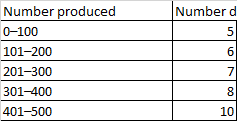

A random sample was taken to determine the actual number of defects. Table 11.6 shows the results of the survey.

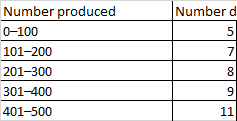

Pyhton Function 
scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)
Where:
f_obs : Observed frequencies in each category.
f_Exp : Expected frequencies in each category. By default the categories are assumed to be equally likely.
ddof=  degrees of freedom optional. 
axis = The axis of the broadcast result of f_obs and f_exp along which to apply the test. If axis is None, all values in f_obs are treated as a single data set. Default is 0.

In [ ]:
expected_defects = [ 5,6,7,8,10]
actual_defects = [5,7,8,9,11]
f_expected= np.array(expected_defects)
f_observed = np.array(actual_defects)
chisq, p_val = stats.chisquare(f_obs=f_observed, f_exp=f_expected, ddof=4, axis=0) 
if (p_val <  0.05):
  print("Reject Ho Null Hypothesis : At a 5% level of significance, from the sample data, there is not sufficient evidence to conclude that the defective product occurs eqaully in each lot")
else:
  print("Fail to Reject(Ho) NUll Hypothesis : At a 5% level of significance, from the sample data, there is sufficient evidence to conclude that the defective product occurs eqaully in each lot ")



Fail to Reject(Ho) NUll Hypothesis : At a 5% level of significance, from the sample data, there is sufficient evidence to conclude that the defective product occurs eqaully in each lot 


**The Chi-square test of independence**
Checks whether two variables are likely to be related or not.
1. Data values that are a simple random sample from the population of interest.
2. Two categorical or nominal variables.
3. For each combination of the levels of the two variables, we need at least five expected values.

For Chi Square test, the data must be present in contigency table. 
cipy.stats.chi2_contingency(observed, correction=True, lambda_=None)
observed:  The contingency table. The table contains the observed frequencies .
correction: If True, and the degrees of freedom is 1, apply Yates’ correction for continuity. The effect of the correction is to adjust each observed value by 0.5 towards the corresponding expected value.
lambda_float :
By default, the statistic computed in this test is Pearson’s chi-squared statistic


Assume that we want to test if there is a statistically significant difference in Genders (M, F) population between Smokers and Non-Smokers.

H0: Smoking is independent of geneder. 
Ha : Smoking is depenedent on geneder. 


In [ ]:
df = pd.DataFrame({'Gender' : ['M', 'M', 'M', 'F', 'F'] * 10,
                   'isSmoker' : ['Smoker', 'Smoker', 'Non-Smpoker', 'Non-Smpoker', 'Smoker'] * 10
                  })
df.head()
#create Contigency table from the data frame
contigency= pd.crosstab(df['Gender'], df['isSmoker'] )
contigency

#Apply Chi Square test
from scipy.stats import chi2_contingency

c, p, dof, expected = chi2_contingency(contigency)
print(p)
if (p > 0.05):
  print ( "Accept Ho : At 5% significance level, from the sample data it can be stated that smoking is not dependnet on gender")
else: 
 print ( " Accept Ha: At 5% significance level, from the sample data it can be stated that smoking is  dependnet on gender")

NameError: ignored

 **chi-square test of homogeneity**
The test is applied to a single categorical variable from two or more different populations. It is used to determine whether frequency counts are distributed identically across different populations.
This test assumes: 
For each population, the sampling method is simple random sampling.
The variable under study is categorical.
If sample data are displayed in a contingency table (Populations x Category levels), the expected frequency count for each cell of the table is at least 5.

Do male and female college students have the same distribution of living arrangements? Use a level of
significance of 0.05. Suppose that 250 randomly selected male college students and 300 randomly selected
female college students were asked about their living 
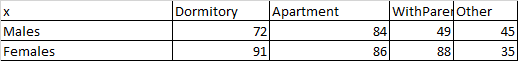


Ho:  The distribution of living arrangements for male college students is the same as the distribution of living
arrangements for female college students.
Ha: The distribution of living arrangements for male college students is not the same as the distribution of living
arrangements for female college students.

To find the median of a distribution, we can use the percent point function ppf, which is the inverse of the

In [ ]:
from scipy.stats import chi2_contingency
from prettytable import PrettyTable
from scipy.stats import chi2
#copy the above table
t = PrettyTable(['Type', 'Dormitory', 'Apartment','WithParents', 'others'])
t.add_row(['Male',72,84,49,45])
t.add_row(['Female',91,86,88,35])
print(t)

table = [[72,84,49,45], [91,86,88,35]]
stat,p,dof,expected = chi2_contingency(table)
prob = 0.95
critical = chi2.ppf(prob, dof)
print(critical)
if abs(stat) >= critical:
    print(stat, dof ,p ,'Reject Ho : At significance level 5% , there is not enough evidence to conclude that living arrangements made by male student are same as female student')
else:
     print(stat, dof ,p ,'Accept Ho : At significance level 5% , there is  enough evidence to conclude that living arrangements made by male student are same as female student')

+--------+-----------+-----------+-------------+--------+
|  Type  | Dormitory | Apartment | WithParents | others |
+--------+-----------+-----------+-------------+--------+
|  Male  |     72    |     84    |      49     |   45   |
| Female |     91    |     86    |      88     |   35   |
+--------+-----------+-----------+-------------+--------+
7.814727903251179
10.128696811826693 3 0.017503254828611012 Reject the Null Hypothesis


**One-way ANOVA**
The purpose of a one-way ANOVA test is to determine the existence of a statistically significant difference among several
group means. The test actually uses variances to help determine if the means are equal or not.
1. Each population from which a sample is taken is assumed to be normal.
2. All samples are randomly selected and independent.
3. The populations are assumed to have equal standard deviations (or variances).
4. The factor is a categorical variable.
5. The response is a numerical variable

Ho = μ1 = μ2 = μ3 = . . .μk 

Ha : At least two of the group means μ1, μ2, μ3, . . . ,μk are not equal. That is, μi≠μ j for some i≠ j .

**Example**
The New York Choral Society divides male singers up into four categories from highest voices to lowest: Tenor1,
Tenor2, Bass1, Bass2. In the table are heights of the men in the Tenor1 and Bass2 groups. One suspects that taller men
will have lower voices, and that the variance of height may go up with the lower voices as well. Do we have good
evidence that the variance of the heights of singers in each of these two groups (Tenor1 and Bass2) are different?

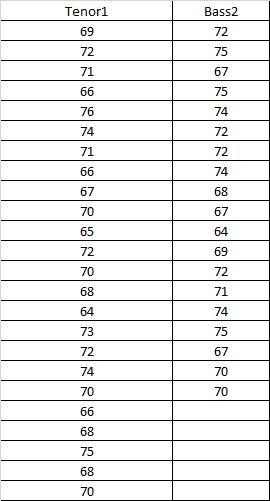

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.multicomp

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd

df = pd.DataFrame({'Tenor1' : [69,72 ,71 ,66, 76, 74, 71, 66, 67, 70, 65, 72, 70, 68, 64, 73, 72, 74 ,70, 66, 68, 75, 68, 70],
                   'Bass1' : [72, 75, 67, 75, 74, 72, 72, 74, 68, 67, 64, 69, 72, 71, 74, 75, 67, 70, 70, 55, 52, 65, 77, 78] 
                  })

mod = ols('Tenor1 ~ Bass1', data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)



            df     sum_sq    mean_sq         F    PR(>F)
Bass1      1.0    6.52507   6.525070  0.597882  0.447616
Residual  22.0  240.09993  10.913633       NaN       NaN
